In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def cost_function(X,y,w): ###define cost function
  hypothesis = np.dot(X,w.T) ###calculation of hypothesis for all instances
  J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2) ####as mention in the class notes
  # J = (1/(2*len(y))) * np.sum((hypothesis - y) ** 2)+(lamb/2)*np.sum(w**2) ####as mention
  return J

In [12]:
def batch_gradient_descent(X,y,w,alpha,iters,lamb):
  cost_history = np.zeros(iters) # cost function for each iteration
  #initalize our cost history list to store the cost function on every iteration
  for i in range(iters):
    hypothesis = np.dot(X,w.T)
    #w = (w*(1-alpha*lamb)) -(alpha/len(y)) * np.dot(hypothesis - y, X)
    w = w - (alpha/len(y)) * np.dot(hypothesis - y, X)
    #cost_history[i] = cost_function(X,y,w,lamb)
    cost_history[i] = cost_function(X,y,w)
  return w,cost_history

In [13]:
def MB_gradient_descent(X,y,w,alpha, iters, batch_size):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-batch_size)
    ind_x = X[rand_index:rand_index+batch_size]
    ind_y = y[rand_index:rand_index+batch_size]
    w = w - (alpha/batch_size) * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

In [14]:
def stochastic_gradient_descent(X,y,w,alpha, iters):
  cost_history = np.zeros(iters)
  for i in range(iters):
    rand_index = np.random.randint(len(y)-1)
    ind_x = X[rand_index:rand_index+1]
    ind_y = y[rand_index:rand_index+1]
    w = w - alpha * (ind_x.T.dot(ind_x.dot(w) - ind_y))
    cost_history[i] = cost_function(ind_x,ind_y,w)
  return w, cost_history

trainingData

In [15]:
dataxtr = pd.read_csv('/content/drive/MyDrive/xtr.csv',header=None)
dataytr = pd.read_csv('/content/drive/MyDrive/ytr.csv',header=None)


TestingData

In [16]:
dataxte = pd.read_csv('/content/drive/MyDrive/xte.csv',header=None)
datayte = pd.read_csv('/content/drive/MyDrive/yte.csv',header=None)


In [47]:
data_XTraining=dataxtr.values
X=data_XTraining[:,:]
# print(X)
m=X.shape[0]
xmin=np.min(X,axis=0)
xmax=np.max(X,axis=0)
# print(xmin , xmax)
X = (X- xmin)/(xmax-xmin) #Normalization
# print(X)

In [49]:
pp = np.ones([m, 1]) # vector containg ones as all elements
X = np.append(pp,X, axis=1) #Column of ones
print(X)

[[1.         0.51322751 0.0729927 ]
 [1.         0.51322751 0.74452555]
 [1.         0.51322751 0.62043796]
 [1.         0.51322751 0.        ]
 [1.         0.51322751 0.6350365 ]
 [1.         0.51322751 0.02919708]
 [1.         0.51322751 0.57664234]
 [1.         0.51322751 0.64233577]
 [1.         0.51322751 0.11678832]
 [1.         0.51322751 0.64963504]
 [1.         0.51322751 0.62043796]
 [1.         0.74603175 0.80291971]
 [1.         0.97883598 0.43065693]
 [1.         0.25396825 0.24817518]
 [1.         0.02116402 0.62773723]
 [1.         0.51322751 0.81021898]
 [1.         0.74603175 1.        ]
 [1.         0.97354497 0.44525547]
 [1.         0.02116402 0.25547445]
 [1.         0.50793651 0.64233577]
 [1.         0.73544974 0.82481752]
 [1.         0.97354497 1.        ]
 [1.         0.26984127 0.45985401]
 [1.         0.02116402 0.28467153]
 [1.         0.51322751 0.6350365 ]
 [1.         0.73015873 0.81021898]
 [1.         0.96296296 1.        ]
 [1.         0.25925926 0.45

In [50]:
X.shape

(55, 3)

In [56]:
data_YTraining=dataytr.values
Y=data_YTraining[:,:]
# print(Y)
# m=X.shape[0]
ymin=np.min(Y,axis=0)
ymax=np.max(Y,axis=0)
# print(ymin , ymax)
y = (Y- ymin)/(ymax-ymin) #Normalization
# print(Y)

In [57]:
#Linear regression starts from here
w= np.zeros(X.shape[1]) ##weight initialization
#w=[0.5, 0.5, 0.5]
print(w)

[0. 0. 0.]


In [58]:
alpha=0.05 ##learning rate
iters=100 ###iterations
lamb=0.1
batch_w,J_his = batch_gradient_descent(X,Y,w,alpha,iters,lamb)

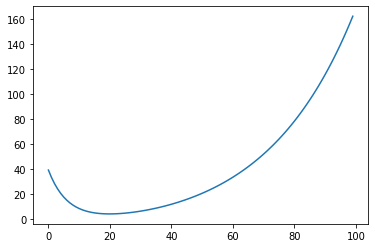

In [59]:
plt.plot(range(iters),J_his)
plt.show()

In [60]:
print(batch_w)

[[ 1.54276325  1.70360337  1.69234304]
 [-0.46190953  0.92471105  0.74660672]
 [-0.09148087  1.06863681  0.92136234]
 [ 1.76066246  1.78826558  1.79514047]
 [-0.13506071  1.05170436  0.90080286]
 [ 1.67350278  1.7544007   1.7540215 ]
 [-0.26074134  0.9659565   0.80943098]
 [-0.15685063  1.04323814  0.89052312]
 [ 1.41202372  1.65280605  1.63066459]
 [-0.17864055  1.03477192  0.88024337]
 [-0.09148087  1.06863681  0.92136234]
 [-1.33036457  0.57407209  0.32522869]
 [-0.91321424  0.72294017  0.51035547]
 [ 1.79281985  1.81547204  1.82330796]
 [ 1.6538796   1.81161537  1.80151125]
 [-0.35801883  1.0019927   0.82769885]
 [-1.61869245  0.49896176  0.22128545]
 [-0.64101827  0.86591511  0.67111353]
 [ 2.76516559  2.24339264  2.32577813]
 [-0.24107482  0.99850869  0.8403609 ]
 [-1.46418271  0.51037373  0.25193498]
 [-2.69705231  0.01784548 -0.34162667]
 [ 1.01358469  1.49950315  1.44420229]
 [ 2.27800591  2.00489091  2.0531794 ]
 [-0.13506071  1.05170436  0.90080286]
 [-1.30482706  0.58489513

In [63]:
alpha=0.005
iters=1200
batch_size=50
mini_batch_w,J_mini_batch = MB_gradient_descent(X,Y,w,alpha,iters, batch_size)

ValueError: ignored

In [62]:
plt.plot(range(iters),J_mini_batch)
plt.show()

NameError: ignored